# Remove Data With Complete case analysis 

In [38]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [56]:
df = pd.read_csv("/Users/namansisodia/Downloads/sales_data.csv")
df.head()

,Order Date,Order ID,Product,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,22/01/19 21:25,141234,iPhone,"944 Walnut St, Boston, MA 02215",1,700.00,231.000,700.00,469.0000
1,28/01/19 14:15,141235,Lightning Charging Cable,"185 Maple St, Portland, OR 97035",1,14.95,7.475,14.95,7.4750
2,17/01/19 13:33,141236,Wired Headphones,"538 Adams St, San Francisco, CA 94016",2,11.99,NaN,23.98,11.9900
3,05/01/19 20:33,141237,27in FHD Monitor,"738 10th St, Los Angeles, CA 90001",1,149.99,NaN,149.99,52.4965
4,25/01/19 11:59,141238,Wired Headphones,"387 10th St, Austin, TX 73301",1,11.99,NaN,11.99,5.9950


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order Date        500 non-null    object 
 1   Order ID          500 non-null    int64  
 2   Product           457 non-null    object 
 3   Purchase Address  500 non-null    object 
 4   Quantity Ordered  500 non-null    int64  
 5   Price Each        454 non-null    float64
 6   Cost price        495 non-null    float64
 7   turnover          480 non-null    float64
 8   margin            481 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [58]:
# to check the percentage data missing 
df.isnull().mean()*100

Order Date          0.0
Order ID            0.0
Product             8.6
Purchase Address    0.0
Quantity Ordered    0.0
Price Each          9.2
Cost price          1.0
turnover            4.0
margin              3.8
dtype: float64

In [60]:
# To get all the column having missing value but <= 5. % 
col = [var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
col

['Cost price', 'turnover', 'margin']

In [61]:
df[col].sample(5)

,Cost price,turnover,margin
206,49.9950,99.99,49.9950
395,97.4935,149.99,52.4965
303,1.4950,2.99,1.4950
155,561.0000,1700.00,1139.0000
328,49.9950,99.99,49.9950


# Complete Case analsys this will helpfull to remove item with effecting on data set 
## it can only done with 2 thing -- Mising complete at random and Missing data should be less than 5 %

In [64]:
# Lets see how much data left 
len(df[col].dropna())/len(df)


0.914

In [66]:
new = df[col].dropna() 

# let create a new data frame where we can make sure that CCA doesn't effect on data 

In [69]:
new.head()

,Cost price,turnover,margin
0,231.0000,700.00,469.0000
1,7.4750,14.95,7.4750
5,1.4950,2.99,1.4950
6,128.6967,389.99,261.2933
7,5.9750,11.95,5.9750


array([[<Axes: title={'center': 'Cost price'}>,
        <Axes: title={'center': 'turnover'}>],
       [<Axes: title={'center': 'margin'}>, <Axes: >]], dtype=object)

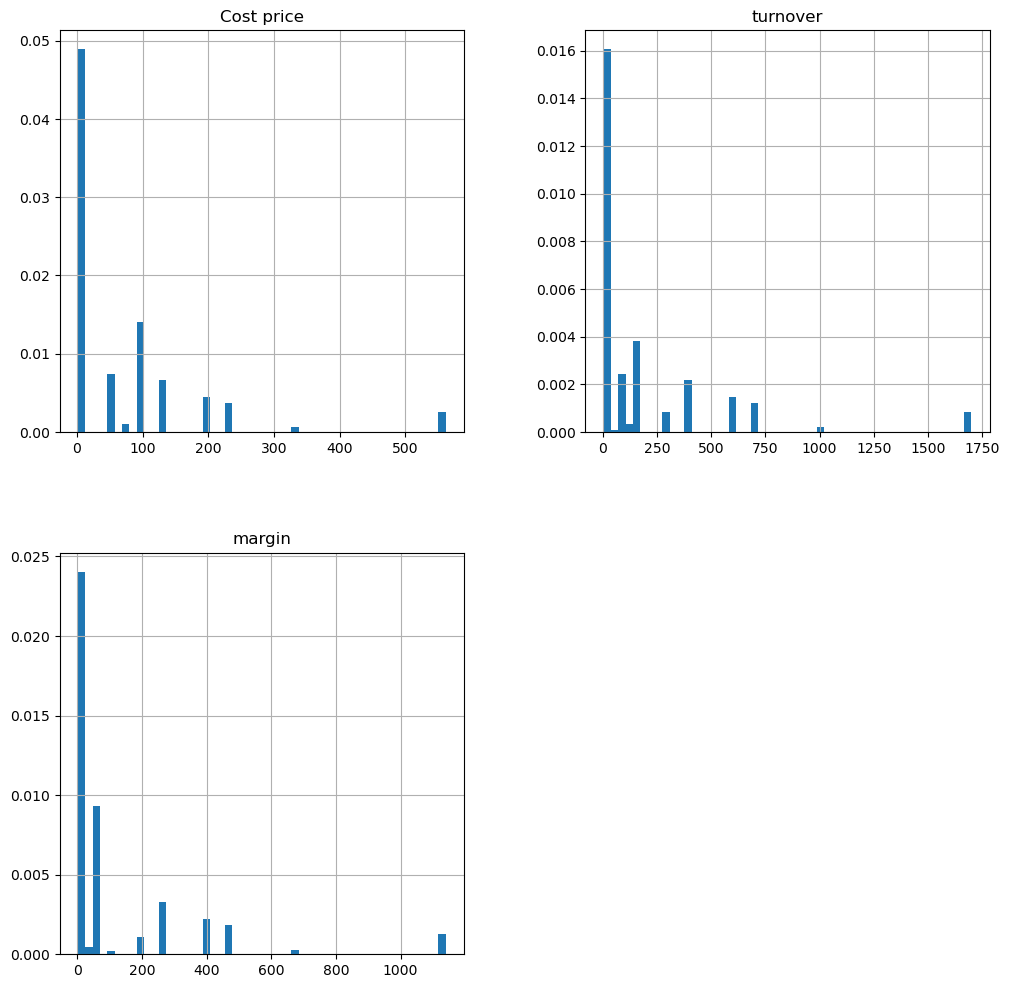

In [72]:
new.hist(bins=50, density =True ,figsize= (12,12))

# Now lets compare individul all column which is change due to CCA 

<Axes: >

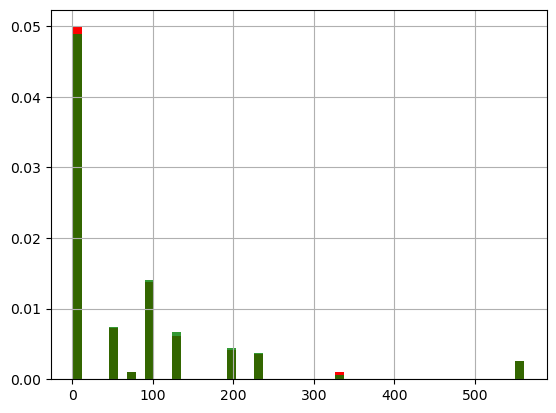

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['Cost price'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca
new['Cost price'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)



<Axes: ylabel='Density'>

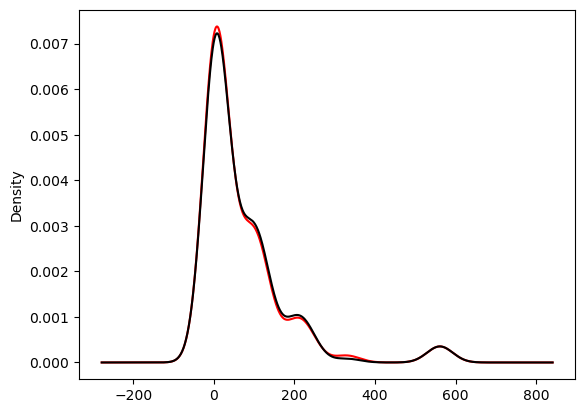

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['Cost price'].plot.density(color='red')

# data after cca
new['Cost price'].plot.density(color='black')

<Axes: >

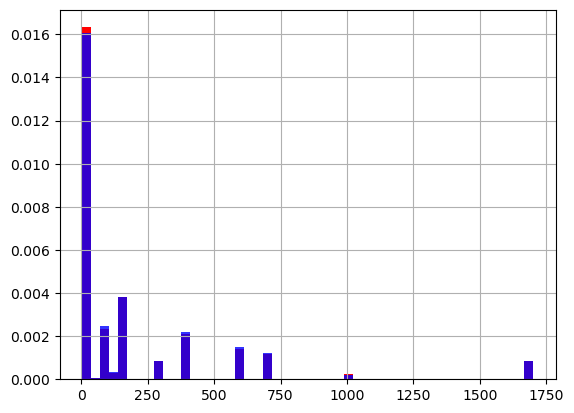

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['turnover'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca
new['turnover'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)


<Axes: ylabel='Density'>

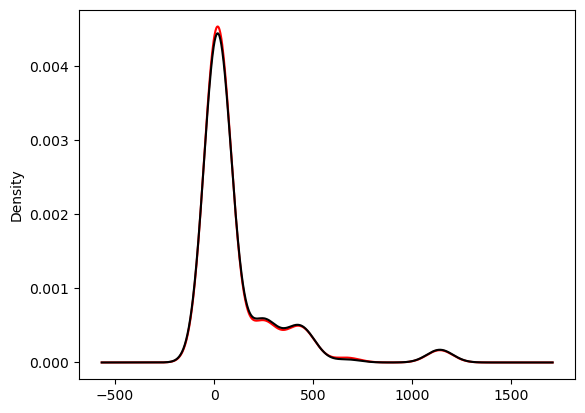

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['margin'].plot.density(color='red')

# data after cca
new['margin'].plot.density(color='black')

# at last the consulion :
# For datasets with less than 5% missing data that is determined to be Missing Completely At Random (MCAR), Complete Case Analysis (CCA) can be a viable option to consider. However, it's important to evaluate the potential impact of data loss and assess alternative imputation methods for more robust results.